In [26]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.modeling.train_test_split import load_data

In [139]:
data = load_data('/Users/itallosilva/Workspace/indaband/track_classifier/output-inda/train_test_split/random_split.data')

In [28]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

# Random Forest

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

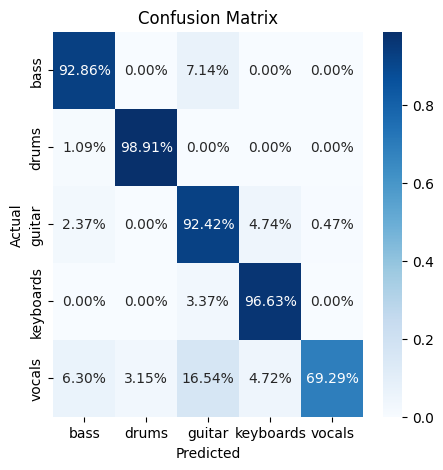

In [30]:
plot_confusion_matrix(y_test, rf.predict(X_test), data.labels)

In [31]:
print_classification_report(y_test, rf.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.92      0.93      0.92       196
       drums       0.99      0.99      0.99       276
      guitar       0.82      0.92      0.87       211
   keyboards       0.93      0.97      0.95       208
      vocals       0.99      0.69      0.81       127

    accuracy                           0.92      1018
   macro avg       0.93      0.90      0.91      1018
weighted avg       0.93      0.92      0.92      1018



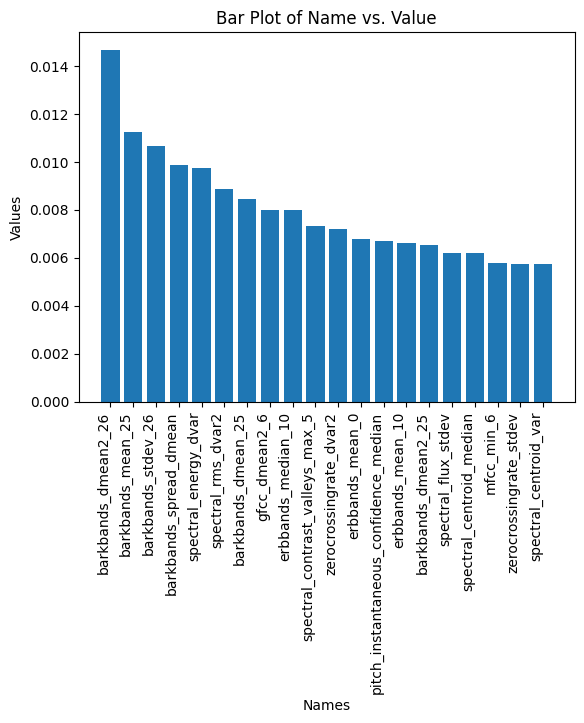

In [32]:
plot_feature_importance(rf.get_feature_importance(data.get_features_names()))

In [33]:
rf_importance = rf.get_feature_importance(data.get_features_names())
rf_importance = sorted(rf_importance.items(), key=lambda item: item[1], reverse=True)[:20]

# XGBoost

In [34]:
xgb = XGBClassifier()
xgb.fit(*data.get_numpy_train_data())

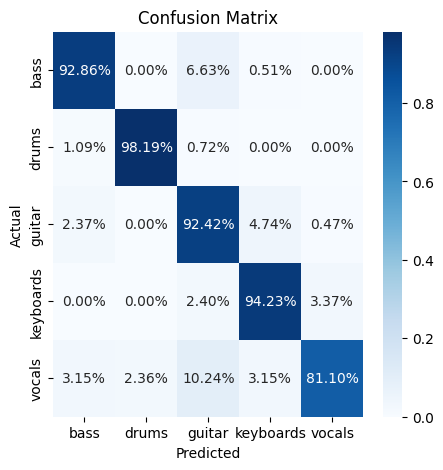

In [35]:
plot_confusion_matrix(y_test, xgb.predict(X_test), data.labels)

In [36]:
print_classification_report(y_test, xgb.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.94      0.93      0.93       196
       drums       0.99      0.98      0.99       276
      guitar       0.86      0.92      0.89       211
   keyboards       0.93      0.94      0.94       208
      vocals       0.93      0.81      0.87       127

    accuracy                           0.93      1018
   macro avg       0.93      0.92      0.92      1018
weighted avg       0.93      0.93      0.93      1018



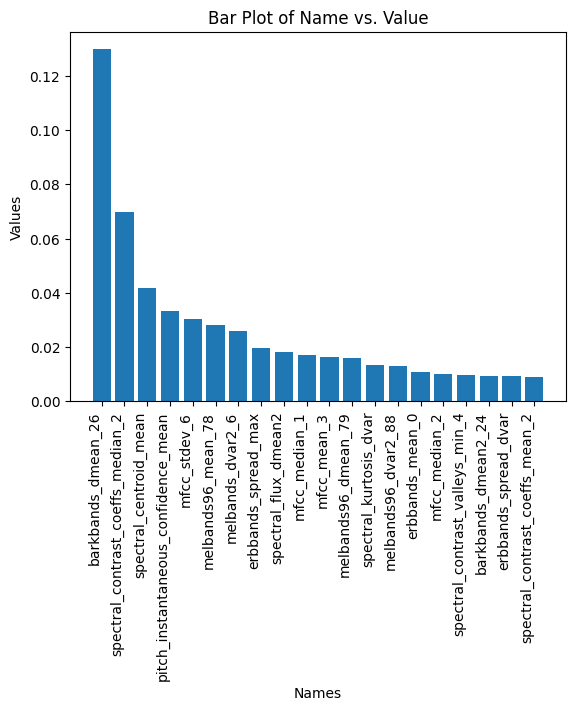

In [37]:
plot_feature_importance(xgb.get_feature_importance(data.get_features_names()))

In [38]:
xgb_importance = xgb.get_feature_importance(data.get_features_names())
xgb_importance = sorted(xgb_importance.items(), key=lambda item: item[1], reverse=True)[:20]

# LightGBM

In [39]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668331
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 2639
[LightGBM] [Info] Start training from score -1.529361
[LightGBM] [Info] Start training from score -1.165919
[LightGBM] [Info] Start training from score -1.471403
[LightGBM] [Info] Start training from score -2.056087
[LightGBM] [Info] Start training from score -2.170392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

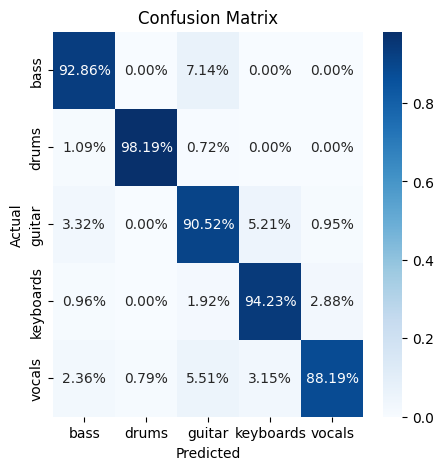

In [40]:
plot_confusion_matrix(y_test, lgbm.predict(X_test), data.labels)

In [41]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.92      0.93      0.93       196
       drums       1.00      0.98      0.99       276
      guitar       0.88      0.91      0.89       211
   keyboards       0.93      0.94      0.94       208
      vocals       0.93      0.88      0.91       127

    accuracy                           0.94      1018
   macro avg       0.93      0.93      0.93      1018
weighted avg       0.94      0.94      0.94      1018



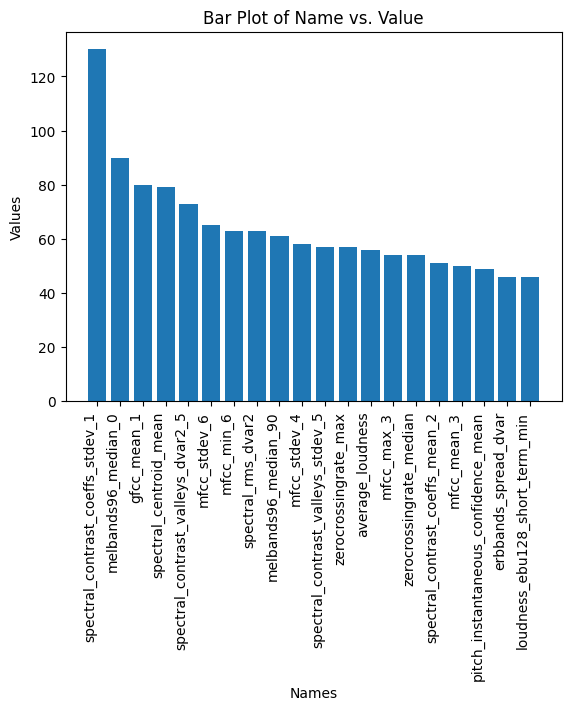

In [42]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [43]:
lgbm_importance = lgbm.get_feature_importance(data.get_features_names())
lgbm_importance = sorted(lgbm_importance.items(), key=lambda item: item[1], reverse=True)[:20]

# Analyzing feature importance

In [55]:
import pandas as pd
import re

In [57]:
rf_df = pd.DataFrame(rf_importance, columns=['feature', 'importance'])
rf_df['group'] = rf_df['feature'].apply(lambda x : re.sub('\d+', '', x.split('_')[0]))
rf_df['model'] = 'RandomForest'

In [58]:
xgb_df = pd.DataFrame(xgb_importance, columns=['feature', 'importance'])
xgb_df['group'] = xgb_df['feature'].apply(lambda x : re.sub('\d+', '', x.split('_')[0]))
xgb_df['model'] = 'XGBoost'

In [59]:
lgbm_df = pd.DataFrame(lgbm_importance, columns=['feature', 'importance'])
lgbm_df['group'] = lgbm_df['feature'].apply(lambda x : re.sub('\d+', '', x.split('_')[0]))
lgbm_df['model'] = 'LightGBM'

In [63]:
df = pd.concat([rf_df, xgb_df, lgbm_df]).reset_index(drop=True)

In [99]:
df.to_csv('fimportance.csv', index=False)

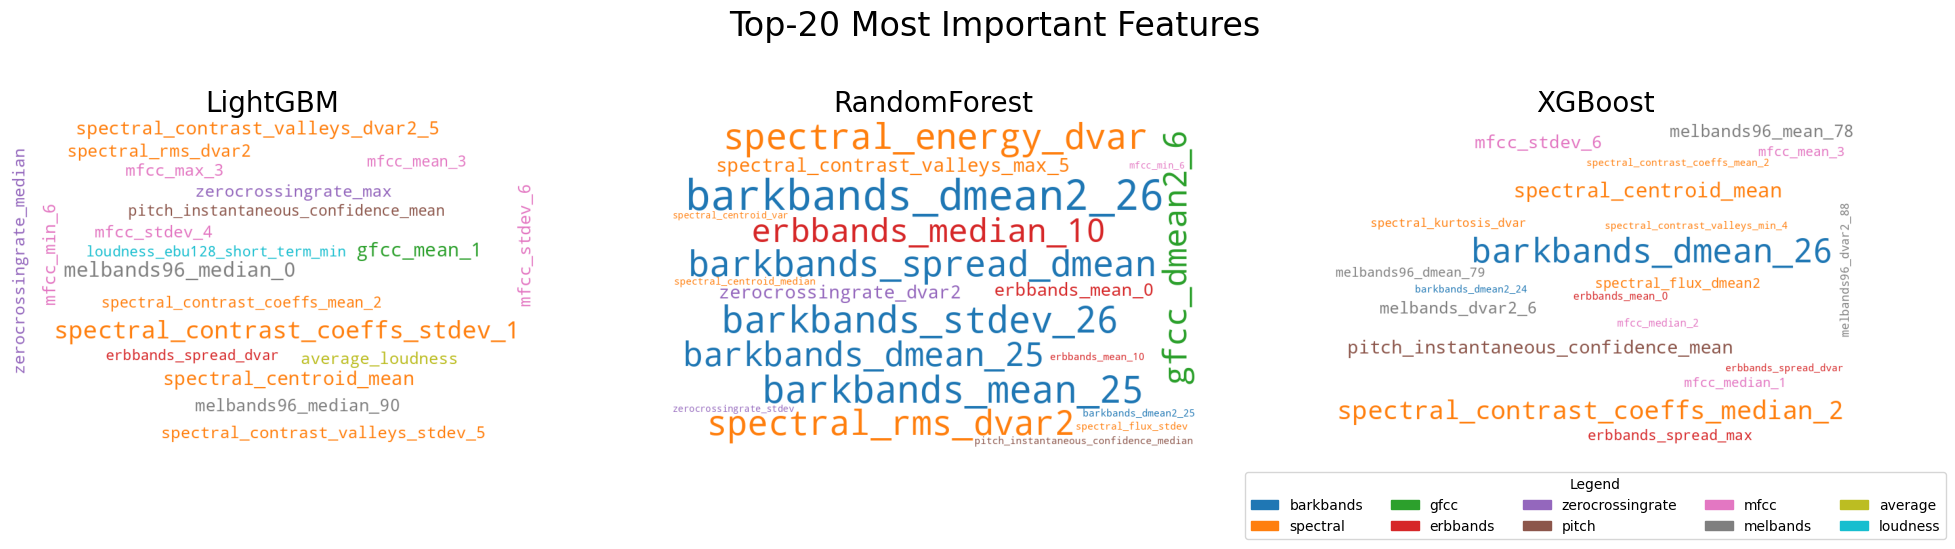

In [132]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.patches import Patch
import numpy as np

# Create a color map for groups
unique_groups = df['group'].unique()
color_cycle = plt.cm.tab10(np.arange(len(unique_groups)))
color_map = dict(zip(unique_groups, color_cycle))

# Create subplots for each model
fig, axes = plt.subplots(1, len(df['model'].unique()), figsize=(20, 10))
axes = np.array(axes).flat

def get_color_feature(word, **kwargs):
    fclass = re.sub('\d+', '', word.split('_')[0])
    return tuple(int(x * 255) for x in color_map[fclass][:3])

for i, (model, group) in enumerate(df.groupby('model')):
    wordcloud = WordCloud(width=800, height=500, colormap='tab20', background_color='white')
    
    # Generate the word cloud for the current model and group
    wordcloud.fit_words(dict(zip(group['feature'], group['importance'])))
    
    # Set the title for the subplot
    axes[i].set_title(model, fontsize = 20)
    
    # Display the word cloud with appropriate colors
    axes[i].imshow(wordcloud.recolor(color_func=get_color_feature))
    axes[i].axis('off')

legend_elements = [Patch(color=color, label=group) for group, color in color_map.items()]
plt.legend(handles=legend_elements, title="Legend", loc='lower center', ncol = 5, bbox_to_anchor=(0.5, -0.3))

plt.suptitle('Top-20 Most Important Features', fontsize=24, y=0.75)

# Show the subplots
plt.tight_layout()
plt.show()


# Using only the top-20 important features

In [137]:
unique_features = list(df['feature'].unique())

In [146]:
len(unique_features)

51

In [140]:
X_train_if, y_train_if = data.X_train[unique_features].to_numpy(), data.y_train.to_numpy()
X_test_if, y_test_if = data.X_test[unique_features].to_numpy(), data.y_test.to_numpy()

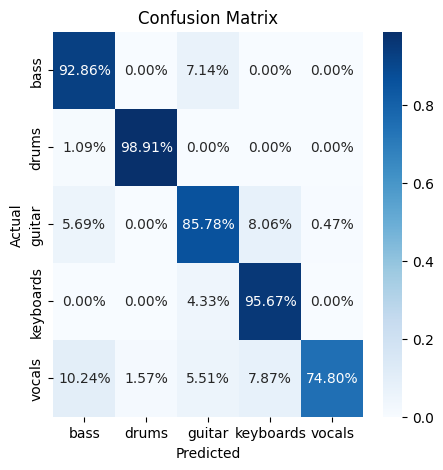

              precision    recall  f1-score   support

        bass       0.87      0.93      0.90       196
       drums       0.99      0.99      0.99       276
      guitar       0.86      0.86      0.86       211
   keyboards       0.88      0.96      0.92       208
      vocals       0.99      0.75      0.85       127

    accuracy                           0.91      1018
   macro avg       0.92      0.90      0.90      1018
weighted avg       0.92      0.91      0.91      1018



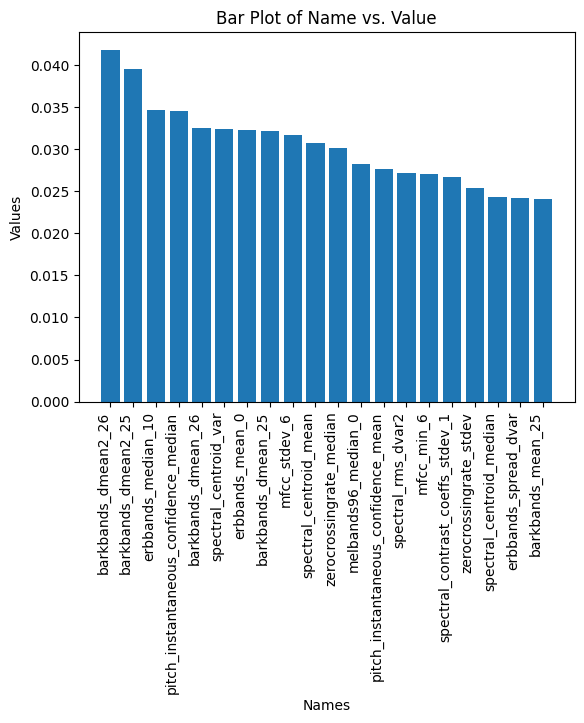

In [143]:
rf_if = RandomForestClassifier()
rf_if.fit(X_train_if, y_train_if)

plot_confusion_matrix(y_test_if, rf_if.predict(X_test_if), data.labels)
print_classification_report(y_test_if, rf_if.predict(X_test_if), data.labels)
plot_feature_importance(rf_if.get_feature_importance(unique_features))

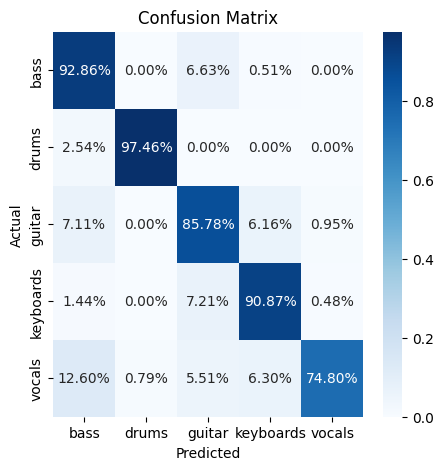

              precision    recall  f1-score   support

        bass       0.87      0.93      0.90       196
       drums       0.99      0.99      0.99       276
      guitar       0.86      0.86      0.86       211
   keyboards       0.88      0.96      0.92       208
      vocals       0.99      0.75      0.85       127

    accuracy                           0.91      1018
   macro avg       0.92      0.90      0.90      1018
weighted avg       0.92      0.91      0.91      1018



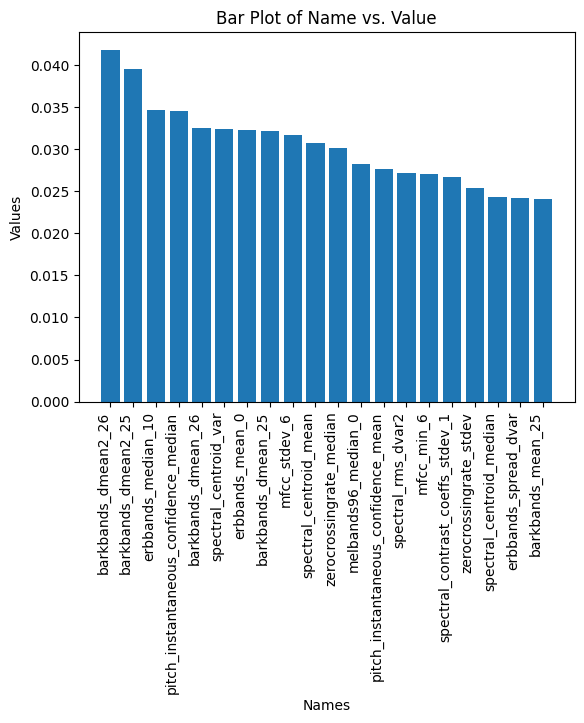

In [144]:
xgb_if = XGBClassifier()
xgb_if.fit(X_train_if, y_train_if)

plot_confusion_matrix(y_test_if, xgb_if.predict(X_test_if), data.labels)
print_classification_report(y_test_if, rf_if.predict(X_test_if), data.labels)
plot_feature_importance(rf_if.get_feature_importance(unique_features))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13005
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 51
[LightGBM] [Info] Start training from score -1.529361
[LightGBM] [Info] Start training from score -1.165919
[LightGBM] [Info] Start training from score -1.471403
[LightGBM] [Info] Start training from score -2.056087
[LightGBM] [Info] Start training from score -2.170392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

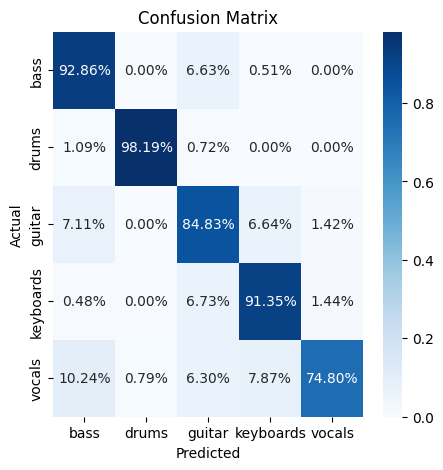

              precision    recall  f1-score   support

        bass       0.87      0.93      0.90       196
       drums       0.99      0.99      0.99       276
      guitar       0.86      0.86      0.86       211
   keyboards       0.88      0.96      0.92       208
      vocals       0.99      0.75      0.85       127

    accuracy                           0.91      1018
   macro avg       0.92      0.90      0.90      1018
weighted avg       0.92      0.91      0.91      1018



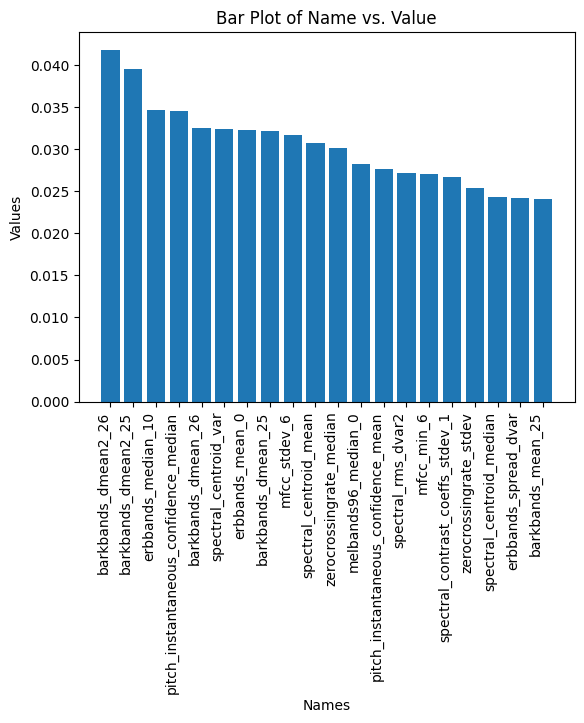

In [145]:
lgbm_if = LightGBMClassifier()
lgbm_if.fit(X_train_if, y_train_if)

plot_confusion_matrix(y_test_if, lgbm_if.predict(X_test_if), data.labels)
print_classification_report(y_test_if, rf_if.predict(X_test_if), data.labels)
plot_feature_importance(rf_if.get_feature_importance(unique_features))